# **TMDB Project**
---

# Acknowledgements
---

`1. The database contained a considerable amount of missing values, which then required a considerable amount of "clean-up". The determined types of missing data is a combination of:`

`- Missing dependent on unobserved parameters (MDP)`

`- Missing at random (MAR)`

`- Missing completely at random (MCAR)`

` `

`2. My approach in handling the missing values was to populate them with a central tendency value.`

`For numeric data:  this was the MEAN for non-financial data and MEDIAN for financial data.`

`For categorical data:  this was a string flag 'undetermined'.`

# 0. | Project Foundations
---

## 0.0 | Module Imports

In [51]:
# Module imports

import pandas as pd               # Dataframes & Data analysis
import numpy as np                # Numpy!
import seaborn as sns             # Visualisation!
import matplotlib.pyplot as plt   # Visualisation!
import ast                        # To decode data in JSON format

## 0.1 | Dataset Upload & Import

In [52]:
# Dataframe creation

import io
df = pd.read_csv("C:/_General/02_Data Analyst - Digital Futures/Academy/_Projects/03_TMDB/Dataset/TMDB_movies.csv")

## 0.2 | Dataset Properties

### 0.2.1 | Preview

In [53]:
# Dataset preview

df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### 0.2.2 | Shape

In [54]:
# Dataset shape

df.shape

(4803, 20)

### 0.2.3 | Describe (Numeric)

In [55]:
# Dataset describe

df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### 0.2.4 | Describe (All)

In [56]:
# Dataset describe all

df.describe(include = 'all')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
count,4.803000e+03,4803,1712,4803.000000,4803,4803,4803,4800,4803.000000,4803,4803,4802,4.803000e+03,4801.000000,4803,4803,3959,4803,4803.000000,4803.000000
unique,NaN,1175,1691,NaN,4222,37,4801,4800,NaN,3697,469,3280,NaN,NaN,544,3,3944,4800,NaN,NaN
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.thehungergames.movie/,NaN,[],en,Batman,Two brothers share a house in LA's Fairfax dis...,NaN,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,NaN,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host,NaN,NaN
freq,NaN,370,4,NaN,412,4505,2,1,NaN,351,2977,10,NaN,NaN,3171,4795,3,2,NaN,NaN
mean,2.904504e+07,NaN,NaN,57165.484281,NaN,NaN,NaN,NaN,21.492301,NaN,NaN,NaN,8.226064e+07,106.875859,NaN,NaN,NaN,NaN,6.092172,690.217989
std,4.072239e+07,NaN,NaN,88694.614033,NaN,NaN,NaN,NaN,31.816650,NaN,NaN,NaN,1.628571e+08,22.611935,NaN,NaN,NaN,NaN,1.194612,1234.585891
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,7.900000e+05,NaN,NaN,9014.500000,NaN,NaN,NaN,NaN,4.668070,NaN,NaN,NaN,0.000000e+00,94.000000,NaN,NaN,NaN,NaN,5.600000,54.000000
50%,1.500000e+07,NaN,NaN,14629.000000,NaN,NaN,NaN,NaN,12.921594,NaN,NaN,NaN,1.917000e+07,103.000000,NaN,NaN,NaN,NaN,6.200000,235.000000
75%,4.000000e+07,NaN,NaN,58610.500000,NaN,NaN,NaN,NaN,28.313505,NaN,NaN,NaN,9.291719e+07,118.000000,NaN,NaN,NaN,NaN,6.800000,737.000000


### 0.2.5 | Information

In [57]:
# Dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

# 1. | Data Cleaning
---

## 1.0 | Missing Values

`From section '0.2.5', we can  identify there are missing values within this dataset, specifically linked with 'homepage' and 'tagline' and some anomalies in other columns, such as 'overview', 'release_date' and 'runtime'.`

In [58]:
# Count missing values

print("Total count of missing values = ", df.isnull().sum().sum(), "\n")
df.isnull().sum()

Total count of missing values =  3941 



budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

`With the 'homepage' and 'tagline' columns containing the pradominate amount of missing values (64.4% & 17.6%), they were deemed innacurate to work with and therefore dropped from the data set.`

In [59]:
# Drop 'homepage' column

try:
  df.drop(columns=['homepage', 'tagline'], inplace = True)
except:
  print('Columns has already been dropped')

In [60]:
# Count missing values after drop

print("Total count of missing values = ", df.isnull().sum().sum(), "\n")
df.isnull().sum()

Total count of missing values =  6 



budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

### 1.0.1 | Anomalies

In [61]:
# 'overview' anomalies

df.loc[df['overview'].isnull()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",292539,[],de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Food Chains,7.4,8


In [62]:
# 'release_date' anomalies

df.loc[df['release_date'].isnull()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
4553,0,[],380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,America Is Still the Place,0.0,0


In [63]:
# 'runtime' anomalies

df.loc[df['runtime'].isnull()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,"To Be Frank, Sinatra at 100",0.0,0


`From the above anomaly detection, we can identify the following record culprits:`

In [64]:
# record culprits review

df.iloc[[2656, 4140, 4431, 4553]]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",292539,[],de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Food Chains,7.4,8
4553,0,[],380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.000000,[],[],NaN,0,0.0,[],Released,America Is Still the Place,0.0,0


## 1.1 | Zero Values

`From section '0.2.3', we can identify there are zero values present, which suggests that for certain records, the data entry is inaccurate.`

In [65]:
# Count zero values

zero_counts = (df== 0).sum()
print("Total count of zero values = ", ((df== 0).sum().sum()), "\n")
print(zero_counts)

Total count of zero values =  2625 

budget                  1037
genres                     0
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 1
production_companies       0
production_countries       0
release_date               0
revenue                 1427
runtime                   35
spoken_languages           0
status                     0
title                      0
vote_average              63
vote_count                62
dtype: int64


`These zero values can be deemed as null in their own right and so should be treated/converted as such.`

In [66]:
# Replace 0 with NaN

df.replace(0, np.nan, inplace=True)

In [67]:
# Count zero values after replace

zero_counts = (df== 0).sum()
print("Total count of zero values = ", ((df== 0).sum().sum()), "\n")
print(zero_counts)

Total count of zero values =  0 

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64


In [68]:
# Count null values after zero replace

print("Total count of missing values = ", df.isnull().sum().sum(), "\n")
df.isnull().sum()

Total count of missing values =  2631 



budget                  1037
genres                     0
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 1
production_companies       0
production_countries       0
release_date               1
revenue                 1427
runtime                   37
spoken_languages           0
status                     0
title                      0
vote_average              63
vote_count                62
dtype: int64

### 1.1.1 | Fill New Null Values

`With the predominate columns containing null values being numerical, we will look to fill them with a central tendency value. This will be '.median' for financial data such as 'budget' and 'revenue' and '.mean' for all others.`

In [69]:
# Fill nulls with a central tendency value

df['budget'] = df['budget'].fillna(df['budget'].median())
df['revenue'] = df['revenue'].fillna(df['revenue'].median())
df['popularity'] = df['popularity'].fillna(df['popularity'].mean())
df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())
df['vote_count'] = df['vote_count'].fillna(df['vote_count'].mean())

In [70]:
# Count null values after central tendency value replace

print("Total count of missing values = ", df.isnull().sum().sum(), "\n")
df.isnull().sum()

Total count of missing values =  4 



budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

`Whilst there are still missing values within the dataset, these individual records would have minimal impact in the statistical data gathered from this dataset. Therefore, they are ignored.`



## 1.2 | Empty Values

`Following from support provided in the 'da-2410-chatter' channel surrounding certain column data as strings, a specific method in detecting the string length for potential nulls was applied`

In [71]:
# Count empty values within string columns ('genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages')

genre_empty_counts = df['genres'].str.len() <= 2
print('genre_empty_counts = ', genre_empty_counts.sum())

keywords_empty_counts = df['keywords'].str.len() <= 2
print('keywords_empty_counts = ', keywords_empty_counts.sum())

production_companies_empty_counts = df['production_companies'].str.len() <= 2
print('production_companies_empty_counts = ', production_companies_empty_counts.sum())

production_countries_empty_counts = df['production_countries'].str.len() <= 2
print('production_countries_empty_counts = ', production_countries_empty_counts.sum())

spoken_languages_empty_counts = df['spoken_languages'].str.len() <= 2
print('spoken_languages_empty_counts = ', spoken_languages_empty_counts.sum())

genre_empty_counts =  28
keywords_empty_counts =  412
production_companies_empty_counts =  351
production_countries_empty_counts =  174
spoken_languages_empty_counts =  86


`These empty string values can be deemed as null in their own right and so should be treated/converted as such.`

In [72]:
# Replace empty string values with 'undetermined'

df.loc[genre_empty_counts, 'genres'] = [['undetermined']] * len(df.loc[genre_empty_counts])
df.loc[keywords_empty_counts, 'keywords'] = [['undetermined']] * len(df.loc[keywords_empty_counts])
df.loc[production_companies_empty_counts, 'production_companies'] = [['undetermined']] * len(df.loc[production_companies_empty_counts])
df.loc[production_countries_empty_counts, 'production_countries'] = [['undetermined']] * len(df.loc[production_countries_empty_counts])
df.loc[spoken_languages_empty_counts, 'spoken_languages'] = [['undetermined']] * len(df.loc[spoken_languages_empty_counts])

In [73]:
# Count empty values within string columns ('genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages') after replacement

genre_empty_counts = df['genres'].str.len() <= 2
print('genre_empty_counts = ', genre_empty_counts.sum())

keywords_empty_counts = df['keywords'].str.len() <= 2
print('keywords_empty_counts = ', keywords_empty_counts.sum())

production_companies_empty_counts = df['production_companies'].str.len() <= 2
print('production_companies_empty_counts = ', production_companies_empty_counts.sum())

production_countries_empty_counts = df['production_countries'].str.len() <= 2
print('production_countries_empty_counts = ', production_countries_empty_counts.sum())

spoken_languages_empty_counts = df['spoken_languages'].str.len() <= 2
print('spoken_languages_empty_counts = ', spoken_languages_empty_counts.sum())

genre_empty_counts =  0
keywords_empty_counts =  0
production_companies_empty_counts =  0
production_countries_empty_counts =  0
spoken_languages_empty_counts =  0


## 1.3 | Duplicate Check

In [74]:
# Check for duplicate records

print("Num of duplicate records = ", df.duplicated().sum())

Num of duplicate records =  0


## 1.4 | Extracting String Columns

### 1.4.1 | Create Copy Dataset

In [75]:
# Create Copy Dataset to include new extracted columns

df_extracted = df.copy()

### 1.4.2 | Custom Function - Extracting String List

In [76]:
# Custom Function - Extract string lists from the following columns ('genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages')

def extract_string_list(string_list):
    try:
        string_list = ast.literal_eval(string_list)
        string = []

        for item in string_list:
          string.append(item['name'])
        return string

    except (ValueError, SyntaxError):
        return 'undetermined'

### 1.4.3 | Running Custom Function on all String Columns

In [77]:
# Running extract string list on 'genre'

df_extracted['genres'] = df_extracted['genres'].apply(extract_string_list)

In [78]:
# Running extract string list on 'keywords'

df_extracted['keywords'] = df_extracted['keywords'].apply(extract_string_list)

In [79]:
# Running extract string list on 'production_companies'

df_extracted['production_companies'] = df_extracted['production_companies'].apply(extract_string_list)

In [80]:
# Running extract string list on 'production_countries'

df_extracted['production_countries'] = df_extracted['production_countries'].apply(extract_string_list)

In [81]:
# Running extract string list on 'spoken_languages'

df_extracted['spoken_languages'] = df_extracted['spoken_languages'].apply(extract_string_list)

In [82]:
# Preview the amended dataframe

df_extracted.tail()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
4798,220000.0,"[Action, Crime, Thriller]",9367,"[united states–mexico barrier, legs, arms, pap...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,[Columbia Pictures],"[Mexico, United States of America]",1992-09-04,2040920.0,81.0,[Español],Released,El Mariachi,6.6,238.0
4799,9000.0,"[Comedy, Romance]",72766,undetermined,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,undetermined,undetermined,2011-12-26,51751835.0,85.0,undetermined,Released,Newlyweds,5.9,5.0
4800,23000000.0,"[Comedy, Drama, Romance, TV Movie]",231617,"[date, love at first sight, narration, investi...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[Front Street Pictures, Muse Entertainment Ent...",[United States of America],2013-10-13,51751835.0,120.0,[English],Released,"Signed, Sealed, Delivered",7.0,6.0
4801,23000000.0,undetermined,126186,undetermined,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,undetermined,"[United States of America, China]",2012-05-03,51751835.0,98.0,[English],Released,Shanghai Calling,5.7,7.0
4802,23000000.0,[Documentary],25975,"[obsession, camcorder, crush, dream girl]",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[rusty bear entertainment, lucky crow films]",[United States of America],2005-08-05,51751835.0,90.0,[English],Released,My Date with Drew,6.3,16.0


# 2. | EDA (Exploratory Data Analysis)
---

## 2.1 | Insights

### 2.1.1 | Correlation

In [83]:
# Correlation of the dataset (numerical data only)
# Using Pearson's product-moment correlation coefficient method

df_extracted.corr(numeric_only = True)

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.058501,0.472078,0.708628,0.246599,0.024443,0.567025
id,-0.058501,1.000000,0.031716,-0.021919,-0.099544,-0.138995,0.013018
popularity,0.472078,0.031716,1.000000,0.620693,0.221410,0.282462,0.774844
revenue,0.708628,-0.021919,0.620693,1.000000,0.234577,0.175864,0.763779
runtime,0.246599,-0.099544,0.221410,0.234577,1.000000,0.354380,0.273063
vote_average,0.024443,-0.138995,0.282462,0.175864,0.354380,1.000000,0.340798
vote_count,0.567025,0.013018,0.774844,0.763779,0.273063,0.340798,1.000000


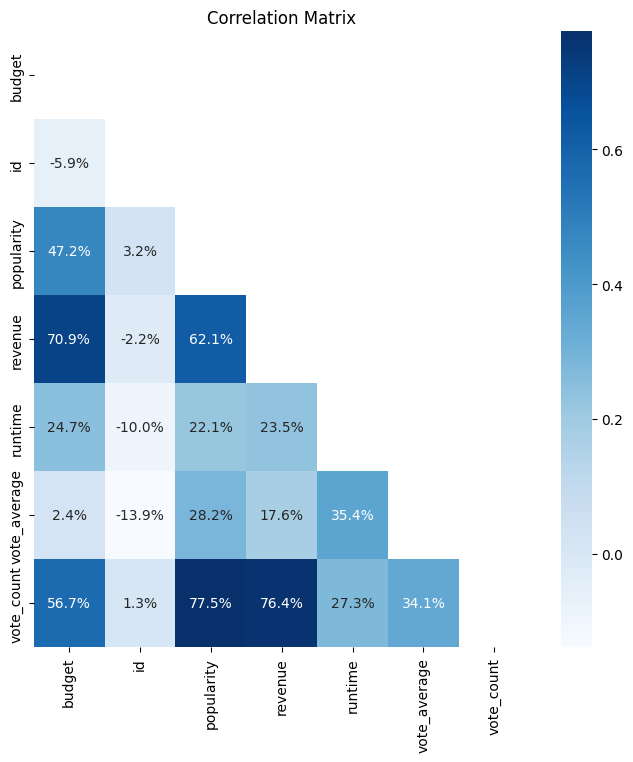

In [84]:
# Visualiation of correlation

plt.figure(figsize = (8,8))

sns.heatmap(df_extracted.corr(numeric_only = True),
            cmap = 'Blues', annot = True,
            fmt = '.1%',
            mask = np.triu(df_extracted.corr(numeric_only = True)))

plt.title("Correlation Matrix", fontsize=12)
plt.show()

`This visualisation presents that budget (70.9%) strongly correlate with a movie’s revenue, with some moderate correlation on its popularity (62.1%). Whilst vote count does present a stronger correlation than budget, this is not something I aim to explore within this data analysis.`

`The correlation between a movies revenue and its budget and popularity will be something I explore further in this notebook.`

### 2.1.2 | "Strong" Correlation between a Movies 'Revenue' and its 'Budget'

#### 2.1.2.1 | Movie Revenue and Budget

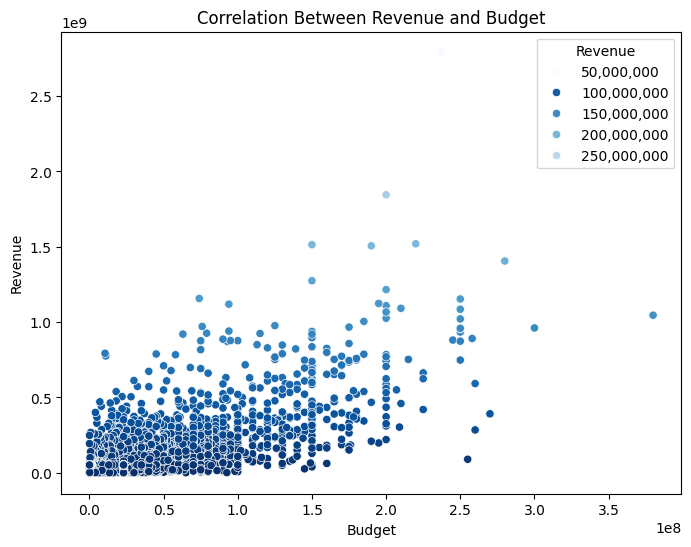

In [85]:
# Visualisation of the correlation between revenue and budget 

plt.figure(figsize = (8, 6))
sns.scatterplot(data = df_extracted, x = 'budget', y = 'revenue', hue = 'revenue', palette = 'Blues_r')

plt.title('Correlation Between Revenue and Budget', fontsize=12)
plt.legend(title = 'Revenue', loc = 'upper right', labels = ['50,000,000', '100,000,000', '150,000,000', '200,000,000', '250,000,000'])
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

`There's a moderate positive corrolation of higher revenue associated with higher budgets, which suggests that, on average, movies with larger budgets tend to generate more revenue. However, it's not a one-to-one relationship.`

`The scattering of points are not tightly clustered along a line, indicating that budget is not the sole determinant of revenue.`

`Additionally, there are some movies with high budgets but relatively low revenue, and vice versa.`

In [86]:
# Identify the top movie's with the highest revenue and budget

highest_budget = df_extracted['budget'].idxmax()
highest_revenue = df_extracted['revenue'].idxmax()

df_extracted.loc[(df['budget'] == df['budget'].max()) | (df['revenue'] == df['revenue'].max())]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,162.0,"[English, Español]",Released,Avatar,7.2,11800.0
17,380000000.0,"[Adventure, Action, Fantasy]",1865,"[sea, captain, mutiny, sword, prime minister, ...",en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,135.413856,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2011-05-14,1.045714e+09,136.0,"[English, Español]",Released,Pirates of the Caribbean: On Stranger Tides,6.4,4948.0


#### 2.1.2.2 | Movie Budget Groups

In [87]:
# Custom Function - Group movies based on their budget

def budget_grouping(budget):
    if budget < 10000:
        return '0 - 10,000'
    elif budget < 100000:
        return '10,000 - 100,000'
    elif budget < 1000000:
        return '100,000 - 1,000,000'
    elif budget < 10000000:
        return '1,000,000 - 10,000,000'
    elif budget < 100000000:
        return '10,000,000 - 100,000,000'
    else:
        return '100,000,000+'

# Call custom function on 'budget' column and read

df_extracted['budget_group'] = df_extracted['budget'].apply(budget_grouping)

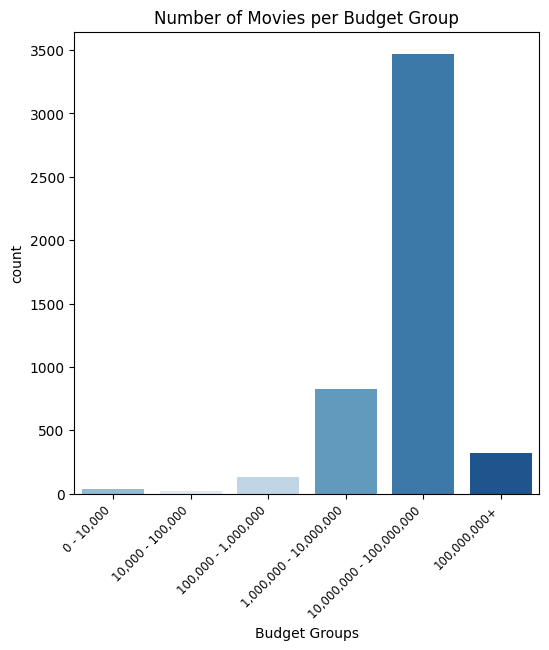

In [88]:
# Visualisation of movie budget groups, identifying the predominate leading budget range

plt.figure(figsize = (6,6))

sns.countplot(data = df_extracted,
              x = 'budget_group',
              order = ['0 - 10,000', '10,000 - 100,000', '100,000 - 1,000,000', '1,000,000 - 10,000,000', '10,000,000 - 100,000,000', '100,000,000+'],
              hue= 'budget_group',
              palette= "Blues_r")

plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'small',)

plt.title('Number of Movies per Budget Group', fontsize=12)
plt.xlabel('Budget Groups')
plt.show()

In [89]:
# Value count for the budget grouping and the percentage of the records

print(df_extracted['budget_group'].value_counts().sort_values(ascending= False))
print(f"\nCategory '10,000,000 - 100,000,000' as percentage (%) of records:     {round(3471/4803*100, 1)}%")


budget_group
10,000,000 - 100,000,000    3471
1,000,000 - 10,000,000       824
100,000,000+                 320
100,000 - 1,000,000          130
0 - 10,000                    35
10,000 - 100,000              23
Name: count, dtype: int64

Category '10,000,000 - 100,000,000' as percentage (%) of records:     72.3%


`This visualisation presents a skewed distribution, with a large cluster of movies in the higher budget groups.`

`Most movies are in the 10,000,000 - 100,000,000 range; while the 100,000,000+ group has fewer entries despite its higher budget.`

`The lower budget groups (0 - 10,000 and 10,000 - 100,000) have significantly fewer counts, indicating fewer entries with smaller budgets.`

#### 2.1.2.3 | Revenue Group-by Budget Groups

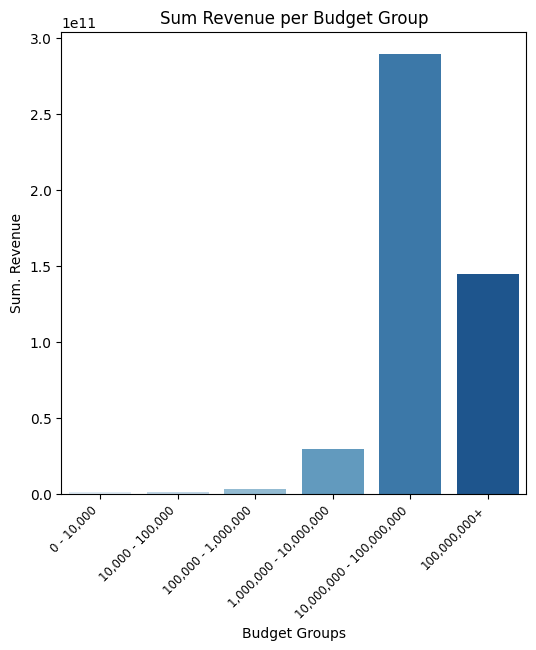

In [90]:
# Visualisation of the grouping the sum revenue of movies by the above budget group

plt.figure(figsize=(6, 6))
sns.barplot(x = ['0 - 10,000', '10,000 - 100,000', '100,000 - 1,000,000', '1,000,000 - 10,000,000', '10,000,000 - 100,000,000', '100,000,000+'],
            y = [1.055594e+09, 1.141710e+09, 3.469134e+09, 2.958248e+10, 2.893039e+11, 1.443949e+11],
            hue= ['0 - 10,000', '10,000 - 100,000', '100,000 - 1,000,000', '1,000,000 - 10,000,000', '10,000,000 - 100,000,000', '100,000,000+'],
            palette= "Blues")

plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'small',)

plt.title('Sum Revenue per Budget Group', fontsize=12)
plt.xlabel('Budget Groups')
plt.ylabel('Sum. Revenue')
plt.show()

In [91]:
# Grouping the sum revenue of movies by the above budget group

print(df_extracted.groupby('budget_group')['revenue'].sum().sort_values(ascending= False))
print(f"\nRevenue percentage difference between the top two budget groups:     {round((2.893039e+11 - 1.443949e+11)/2.893039e+11 * 100, 1)}%")

budget_group
10,000,000 - 100,000,000    2.893039e+11
100,000,000+                1.443949e+11
1,000,000 - 10,000,000      2.958248e+10
100,000 - 1,000,000         3.469134e+09
10,000 - 100,000            1.141710e+09
0 - 10,000                  1.055594e+09
Name: revenue, dtype: float64

Revenue percentage difference between the top two budget groups:     50.1%


`It should come to no surprise that the larger budget groups, such as those between 10,000,000 and 100,000,000, account for the majority of total revenue due to it being the dominant movie count group.`

`However, an interesting point that the 100,000,000+ group, despite its considerably smaller number of movies (3151 less movies), they contribute a significant portion of revenue, suggesting these movies generate very high revenue.`

`Whereas there appears to be a consistent trend between the lower budget group in relation to their budget and revenue.`

### 2.1.3 | "Moderate" Correlation between a Movies 'Revenue' and its 'Popularity'

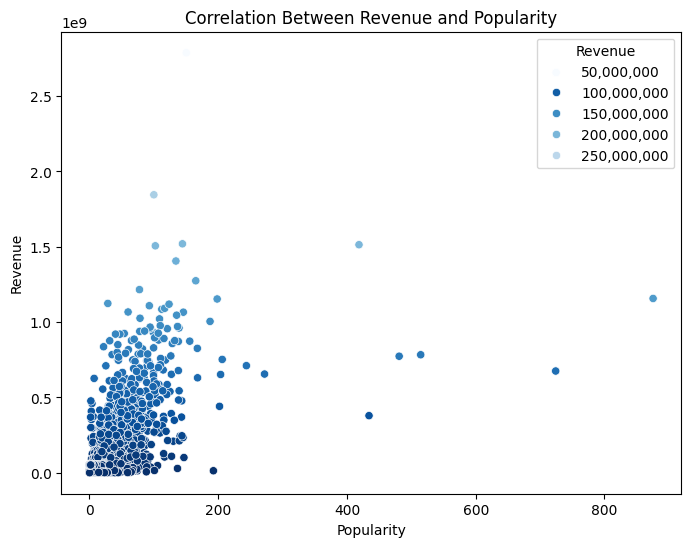

In [92]:
# Visualisation of the correlation between revenue and popularity

plt.figure(figsize = (8, 6))
sns.scatterplot(data = df_extracted, x = 'popularity', y = 'revenue', hue = 'revenue', palette = 'Blues_r')

plt.title('Correlation Between Revenue and Popularity', fontsize=12)
plt.legend(title = 'Revenue', loc = 'upper right', labels = ['50,000,000', '100,000,000', '150,000,000', '200,000,000', '250,000,000'])
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

`This visualisation represents a weak positive correlation between a movies popularity and its revenue. This means that as popularity increases, revenue tends to increase as well, but the relationship is not very strong.`

`There is a clear cluster around lower popularity and revenue values, with fewer data points in the higher ranges. Predominant outliers within the data, which suggest that popularity does not guarantee high revenue.`


In [93]:
# Identify the top movie's with the highest revenue and popularity

highest_budget = df_extracted['popularity'].idxmax()
highest_revenue = df_extracted['revenue'].idxmax()

df_extracted.loc[(df['popularity'] == df['popularity'].max()) | (df['revenue'] == df['revenue'].max())]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,budget_group
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,162.0,"[English, Español]",Released,Avatar,7.2,11800.0,"100,000,000+"
546,74000000.0,"[Family, Animation, Adventure, Comedy]",211672,"[assistant, aftercreditsstinger, duringcredits...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[Universal Pictures, Illumination Entertainment]",[United States of America],2015-06-17,1.156731e+09,91.0,[English],Released,Minions,6.4,4571.0,"10,000,000 - 100,000,000"


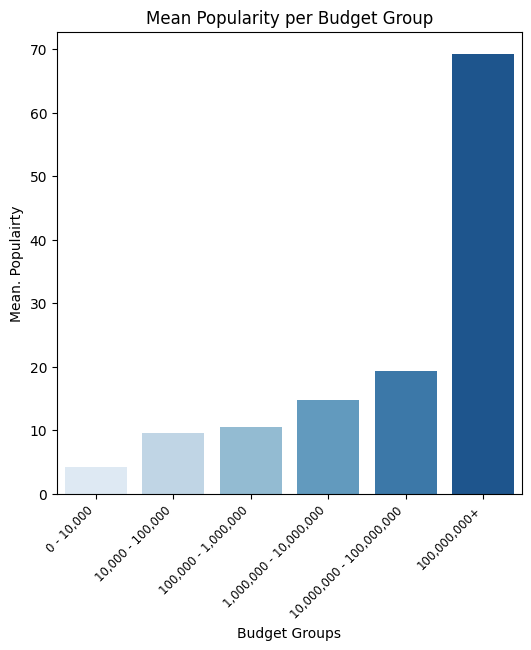

In [94]:
# Visualisation of the grouping the sum revenue of movies by the above budget group

plt.figure(figsize=(6, 6))
sns.barplot(x = ['0 - 10,000', '10,000 - 100,000', '100,000 - 1,000,000', '1,000,000 - 10,000,000', '10,000,000 - 100,000,000', '100,000,000+'],
            y = [ 4.154314, 9.533050, 10.514398, 14.707301, 19.369553, 69.271720],
            hue= ['0 - 10,000', '10,000 - 100,000', '100,000 - 1,000,000', '1,000,000 - 10,000,000', '10,000,000 - 100,000,000', '100,000,000+'],
            palette= "Blues")

plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'small',)

plt.title('Mean Popularity per Budget Group', fontsize=12)
plt.xlabel('Budget Groups')
plt.ylabel('Mean. Populairty')
plt.show()

In [95]:
# Grouping the sum revenue of movies by the above budget group

print(df_extracted.groupby('budget_group')['popularity'].mean().sort_values(ascending= False))
print(f"\nPopularity percentage(%) difference between the top two budget groups:     {round((69.271720 - 19.369553)/69.271720 * 100, 1)}%")

budget_group
100,000,000+                69.271720
10,000,000 - 100,000,000    19.369553
1,000,000 - 10,000,000      14.707301
100,000 - 1,000,000         10.514398
10,000 - 100,000             9.533050
0 - 10,000                   4.154314
Name: popularity, dtype: float64

Popularity percentage(%) difference between the top two budget groups:     72.0%


## 2.2 | SOA (Single Observation Analysis)

### 2.2.1 | SOA Parameters

`Here are the parameters for selecting the appropriate movie:`

` 1. Identical: budget, main genre (the first id listed), original language, production countries, release date (by year) and status`

` 2. Multiple production companies listed.`

` 3. All original data. Not in-filled by my cleaning process`

`Following the above parameters, the following movies were selected:`

In [96]:
# Preview chosen movies from data frame

# Transparency: selection by elimination was done through the .csv data file (excel)

df_soa = df_extracted.loc[(df_extracted['id'] == 1781) | (df_extracted['id'] == 13508)]
df_soa

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,budget_group
4350,1000000.0,[Documentary],1781,"[climate change, greenhouse effect, climate, e...",en,An Inconvenient Truth,A documentary on Al Gore's campaign to make th...,14.139004,"[Lawrence Bender Productions, Paramount Classi...",[United States of America],2006-01-24,46243000.0,100.0,[English],Released,An Inconvenient Truth,6.7,251.0,"1,000,000 - 10,000,000"
4366,1000000.0,[Documentary],13508,"[energy supply, automobile industry, independe...",en,Who Killed the Electric Car?,"In 1996, electric cars began to appear on road...",5.323184,"[Electric Entertainment, Plinyminor, Papercut ...",[United States of America],2006-08-04,1678874.0,92.0,"[English, Français, Magyar]",Released,Who Killed the Electric Car?,7.2,59.0,"1,000,000 - 10,000,000"


`Additional factors for why these two were chosen was for their cultural relevance surrounding environmental awareness. Both documentaries’ keywords revolve around this topic, from 'climate change', 'greenhouse effect' and 'energy supplies. Although, it must be acknowledged that the 'An Inconvenient Truth' focused heavily on this topic compared to 'Who Killed the Electric Car?`

`The most notable differences between these two records however, is their popularity, revenue and vote count`

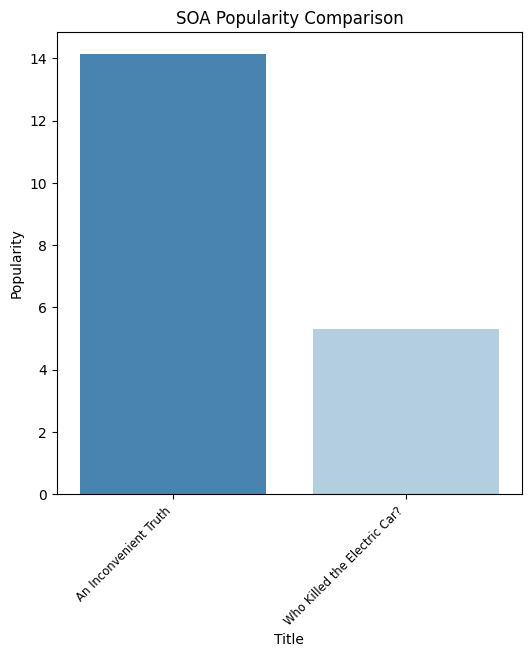

In [97]:
# Barplot comparing SOA popularity
plt.figure(figsize= (6, 6))
sns.barplot(data= df_soa, 
            x= 'title', 
            y= 'popularity',
            hue= 'title',
            palette= 'Blues_r')

plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'small',)


plt.title('SOA Popularity Comparison', fontsize=12)
plt.xlabel('Title')
plt.ylabel('Popularity')
plt.show()

`The 'An Inconvenient Truth' documentary had a significantly higher popularity (14.1) compared with 'Who Killed the Electric Car?' (5.3) being a 90.7% difference.`


`Some considerations around its popularity, being that the former was considered as a landmark documentary in environmental activism, leading to educational campaigns and heightened public awareness of climate change. So much so, that future articles would reflect and compare the state of the environment to it, as such by (The Climate Reality Project, 2017)`

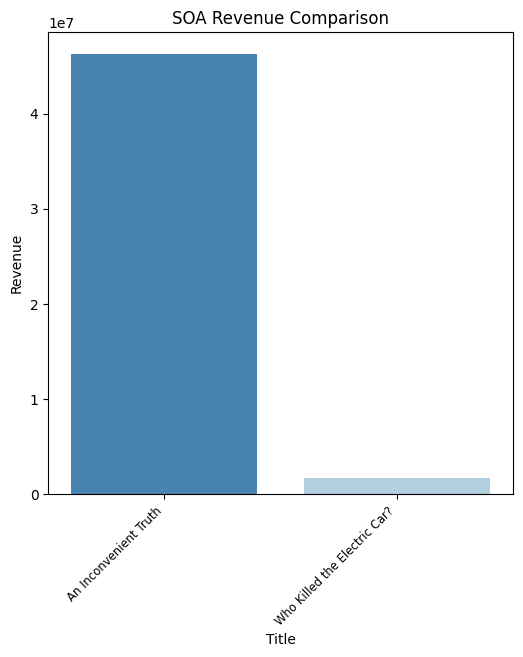

In [98]:
# Barplot comparing SOA revenue
plt.figure(figsize= (6, 6))
sns.barplot(data= df_soa, 
            x= 'title', 
            y= 'revenue',
            hue= 'title',
            palette= 'Blues_r')

plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'small',)


plt.title('SOA Revenue Comparison', fontsize=12)
plt.xlabel('Title')
plt.ylabel('Revenue')
plt.show()

`With it's booming popularity, this correlated with its high revenue (46.24 million) compared with 'Who Killed the Electric Car?' (1.67 million) being a 96.4% difference. However, some consideration around a specific keyword from the 'Who Killed the Electric Car?' documentary, that being an independent film.`

`An independent film is typically associated with a production that is outside of the major film studio system. This may be the leading factor in its lower performing popularity and revenue.`

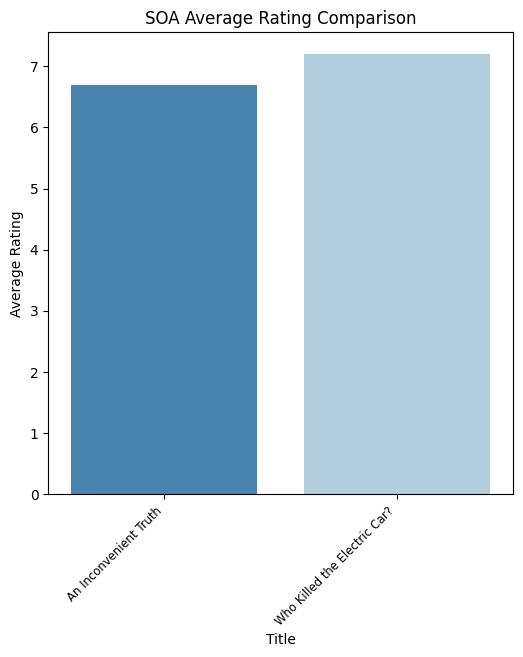

In [99]:
# Barplot comparing SOA revenue
plt.figure(figsize= (6, 6))
sns.barplot(data= df_soa, 
            x= 'title', 
            y= 'vote_average',
            hue= 'title',
            palette= 'Blues_r')

plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'small',)


plt.title('SOA Average Rating Comparison', fontsize=12)
plt.xlabel('Title')
plt.ylabel('Average Rating')
plt.show()

`That said, 'Who Killed the Electric Car?' had a slightly higher average rating (7.2) compared with the 'An Inconvenient Truth' (6.7), being a 7.5% difference.`

` This indicates a stronger appreciation from a smaller audience, as the vote count between the two ('An Inconvenient Truth'(251) vs 'Who Killed the Electric Car?' (59)) is a significant difference.`

# 3. | Summary of Analysis
---

`- A strong positive correlation exists between revenue and budget, whilst its popularity has a moderate positive correlation.`

`- Budget is not the sole determinant of revenue, and most movies have budgets between 10 and 100 million.`

`- 'An Inconvenient Truth' had higher popularity, revenue, and broader audience appeal;`

`- While 'Who Killed the Electric Car?' had a smaller audience and lower revenue, possibly due to its independent film status.`


# 4. | References
---

Ayaz, B. (2024). *Movie Data Analysis*, Kaggle. Available at: https://www.kaggle.com/code/berivanayaz/movie-data-analysis#Feature-Engineering-&-Feature-Selection (Accessed: 25 November 2024).

The Climate Reality Project. (2017). *An inconvenient truth then and now: What’s changed for our climate since 2006?*, The Climate Reality Project. Available at: https://www.climaterealityproject.org/blog/inconvenient-truth-then-and-now (Accessed: 26 November 2024).

The Movie Database (TMDb). (n.d). *Movie Bible*, TMDB. Available at: https://www.themoviedb.org/bible/movie#59f3b1749251414f2000000b (Accessed: 25 November 2024).

The Movie Database (TMDb). (2017). *TMDB 5000 Movie Dataset*, Kaggle. Available at: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv (Accessed: 25 November 2024).